# 回帰まとめ
- 単回帰・重回帰
- Ridge/ Lasso
- LightGBM

## 回帰とは
- 目的変数が連続値の時にデータに Y = f(X) というモデルを当てはめる事。
- この時Xを説明変数とよぶ, Yを目的変数と呼ぶ。

In [65]:
# 評価用の関数
import numpy as np
# yyplot入れる
def eval(true_, predict_):
    """
    評価用の関数
    """
    print("決定係数", r2_score(true_, predict_))
    yvalues = np.concatenate([true_, predict_])
    
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(true_, predict_)
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01])
    plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y_observed', fontsize=24)
    plt.ylabel('y_predicted', fontsize=24)
    plt.title('Observed-Predicted Plot', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.show()
    
    

## 単回帰
- 下記の式の用に目的変数$y$と説明変数$x$の二変量の関係性を、一次方程式で示す
- $  y = ax + b $  


$y$:目的変数,  
$x$:説明変数,  
$a$:傾き,  
$b$:y切片

- ※決定係数の説明については評価指標用のノートブックに改めてまとめ直したい  
1に近い程モデルの当てはまりが良い

In [66]:
# 単一の特徴量のみでの予測をする
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [67]:
# bostonのデータセットを使用する
# 説明変数 13カラム
# 目的変数 単位は、1,000(USD) ボストンの住宅価格
boston = load_boston()

# 説明変数取得
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# 目的変数付与
df["y"] = boston.target

In [68]:
# 訓練用データと評価用データに分割する
train_df, test_df = train_test_split(df)

CRIM_決定係数: 0.0697437661652267
決定係数 0.0697437661652267


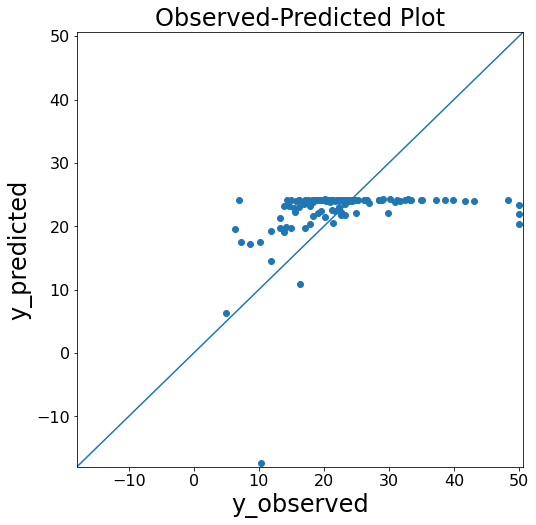

ZN_決定係数: 0.0027629400559725514
決定係数 0.0027629400559725514


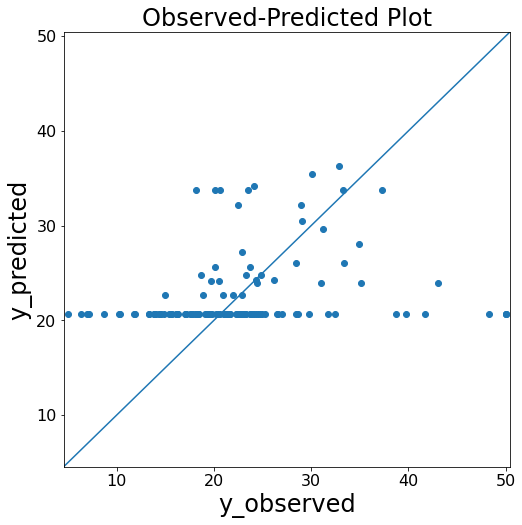

INDUS_決定係数: 0.12716975898576943
決定係数 0.12716975898576943


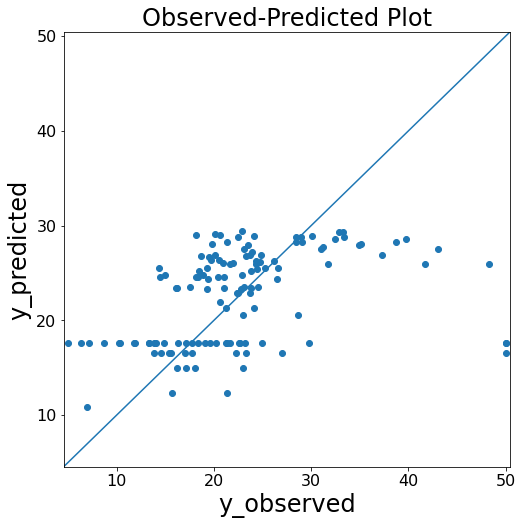

CHAS_決定係数: 0.03501005249166833
決定係数 0.03501005249166833


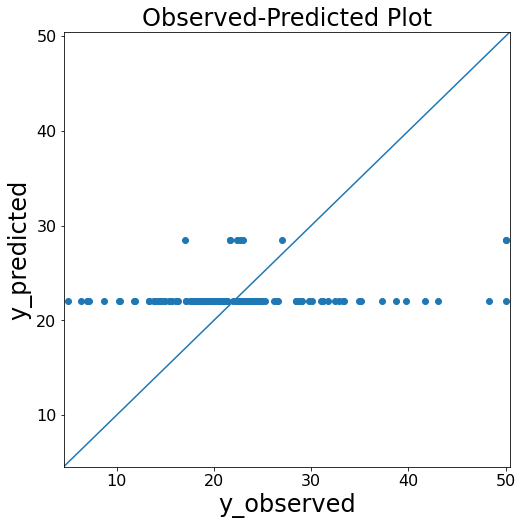

NOX_決定係数: 0.04911676303220602
決定係数 0.04911676303220602


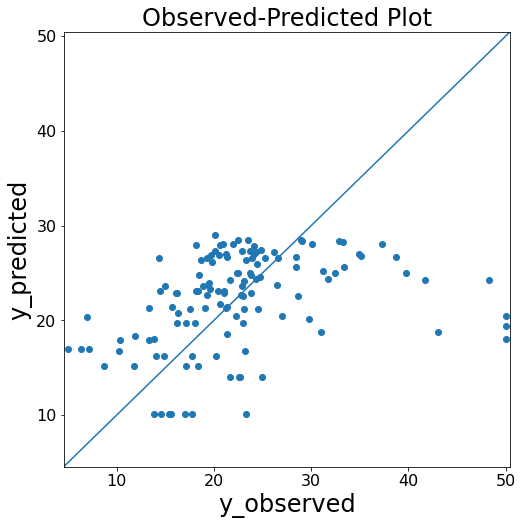

RM_決定係数: 0.32041666555434756
決定係数 0.32041666555434756


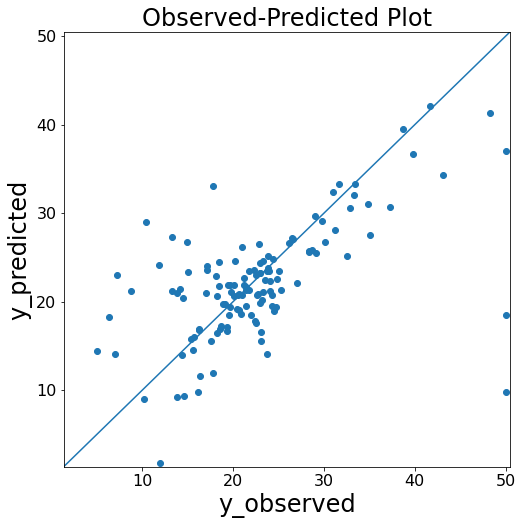

AGE_決定係数: 0.018399152130356256
決定係数 0.018399152130356256


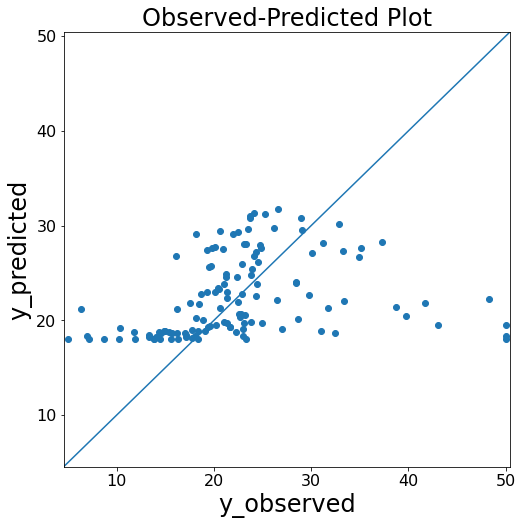

DIS_決定係数: -0.016600898315725088
決定係数 -0.016600898315725088


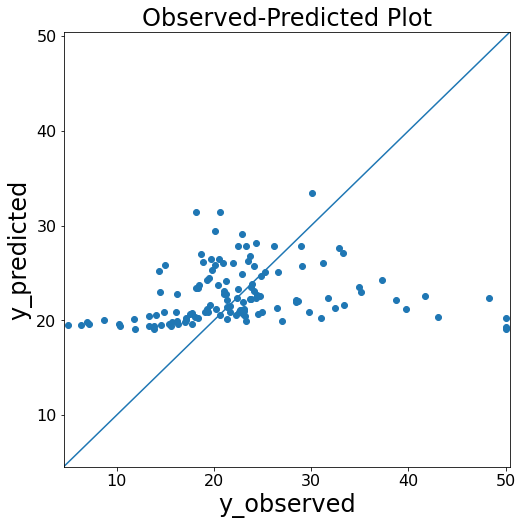

RAD_決定係数: 0.01993889455066855
決定係数 0.01993889455066855


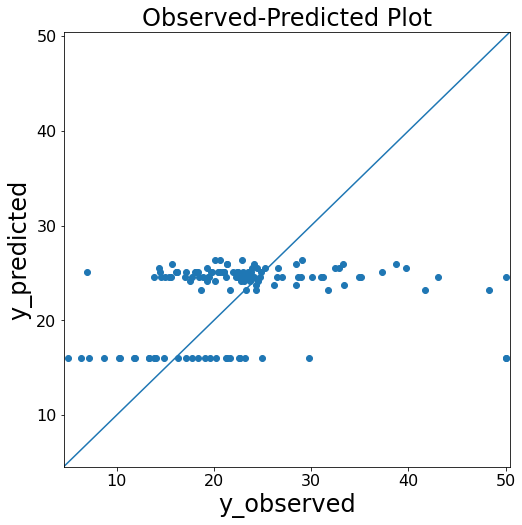

TAX_決定係数: 0.07400301934135622
決定係数 0.07400301934135622


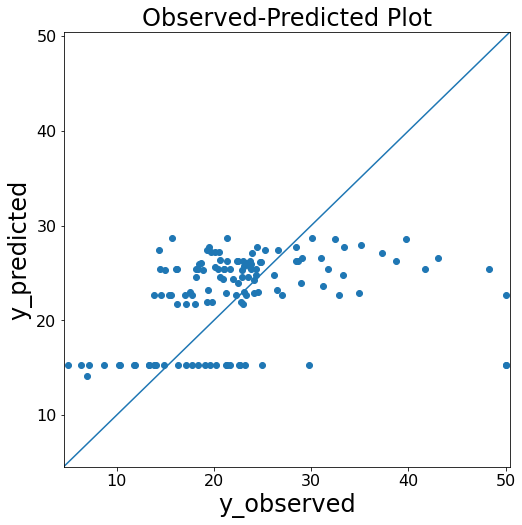

PTRATIO_決定係数: 0.009843611719291823
決定係数 0.009843611719291823


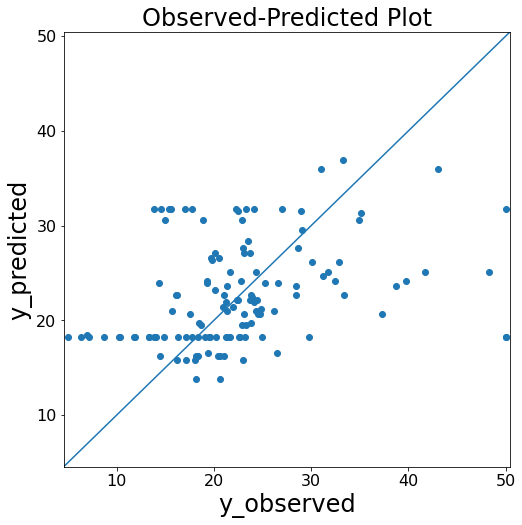

B_決定係数: 0.05745148267441369
決定係数 0.05745148267441369


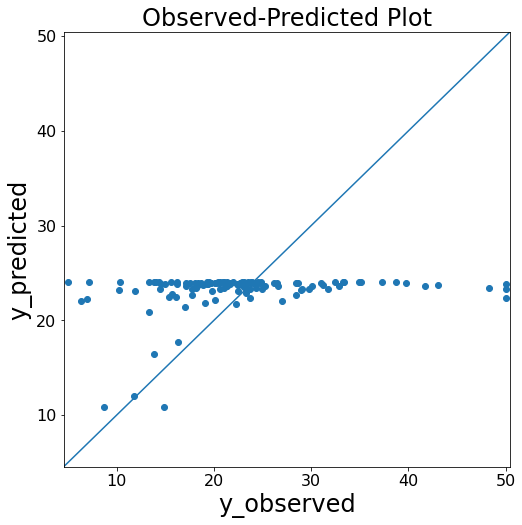

LSTAT_決定係数: 0.4756501402071841
決定係数 0.4756501402071841


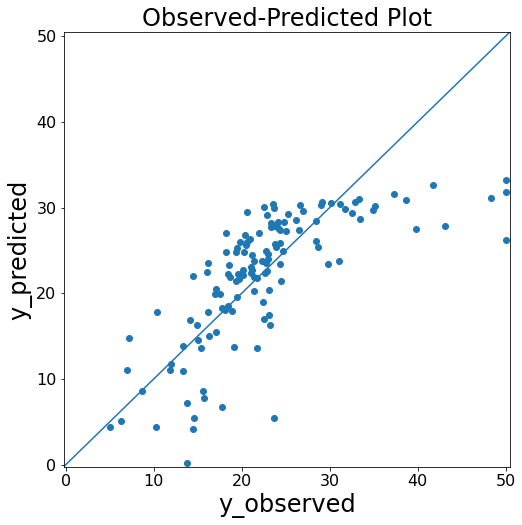

In [69]:
target_col = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
for target in target_col:
    X_train = train_df.loc[:, [target]]
    Y_train = train_df.loc[:, ["y"]]

    X_test = test_df.loc[:, [target]]
    Y_test = test_df.loc[:, ["y"]]
    
    model = linear_model.LinearRegression()
    model.fit(X_train,Y_train)
    
    pred_y = model.predict(X_test)
    
    print("{}_決定係数:".format(target),r2_score(Y_test, pred_y))
    
    eval(Y_test, pred_y)

# 重回帰分析
- 多変量解析の一つ
- 説明変数が複数

- 単回帰
- $  y = ax + b $ 

- 重回帰分析
-  $  y = b1x1 + b2x2 + b3x3 ・・・b0 $ 
- b1,b2,b3... : 偏回帰係数

重回帰分析_決定係数: 0.6453605285123767
決定係数 0.6453605285123767


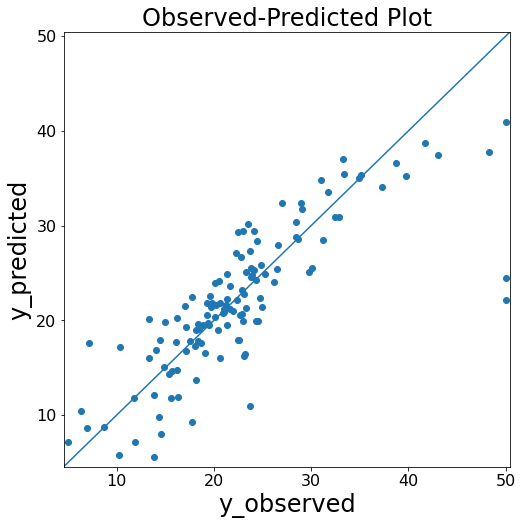

In [70]:
target_col = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
X_train = train_df.loc[:, target_col]
Y_train = train_df.loc[:, ["y"]]

X_test = test_df.loc[:, target_col]
Y_test = test_df.loc[:, ["y"]]
    
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
    
pred_y = model.predict(X_test)
    
print("重回帰分析_決定係数:".format(target),r2_score(Y_test, pred_y))

eval(Y_test, pred_y)

## Ridge回帰とは?
- 過学習を防ぐため線形回帰に正則化項(ペナルティ項)としてL2ノルムを導入したモデル
- 最小二乗法の式に正則化項を加え、その最小を求めることでモデル関数を発見する
- L2ノルム : ユークリッド距離と呼ばれるもので、ベクトル成分同士の差の二乗和の平方根

- 0に収束することが出来ないことに留意
- 係数の絶対値の大きさを可能な限り小さくする

## Lasso回帰とは


In [71]:
import pandas as pd

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [72]:
target_col = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

決定係数 0.6554460628881653


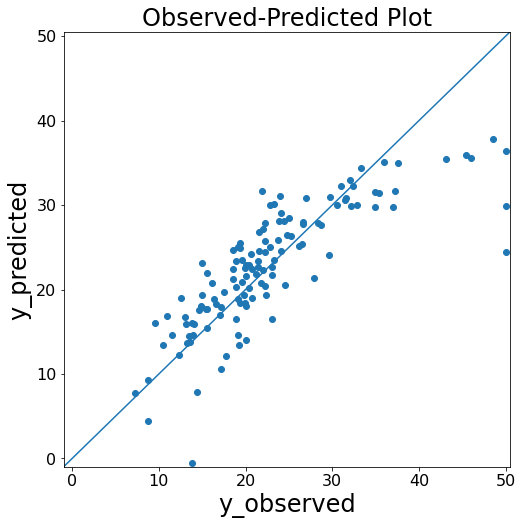

In [73]:
# Lasso回帰
# 訓練用データと、評価用データに分割する
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,target_col],df["y"],random_state=123)

# モデルの作成
model = Lasso()
model.fit(x_train, y_train)

pred = model.predict(x_test)
r2_score(y_test, pred)
eval(y_test, pred)

決定係数 0.6775930475897151


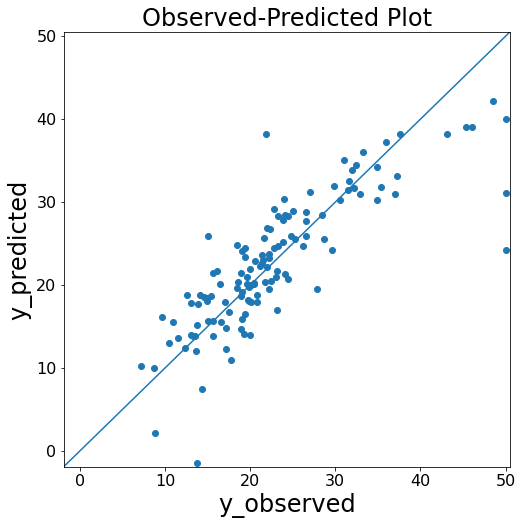

In [37]:
# Ridge回帰

# モデルの作成
model = Ridge()
model.fit(x_train, y_train)

pred = model.predict(x_test)
r2_score(y_test, pred)
eval(y_test, pred)

# LightGBMで線形回帰

In [74]:
import lightgbm as lgb
from sklearn.model_selection import *

In [75]:
# モデルの学習
model = lgb.LGBMRegressor() # モデルのインスタンスの作成
model.fit(X_train, y_train) # モデルの学習

# テストデータの予測
y_pred = model.predict(X_test)
r2_score(y_test, pred)

0.6554460628881653

決定係数 0.6554460628881653


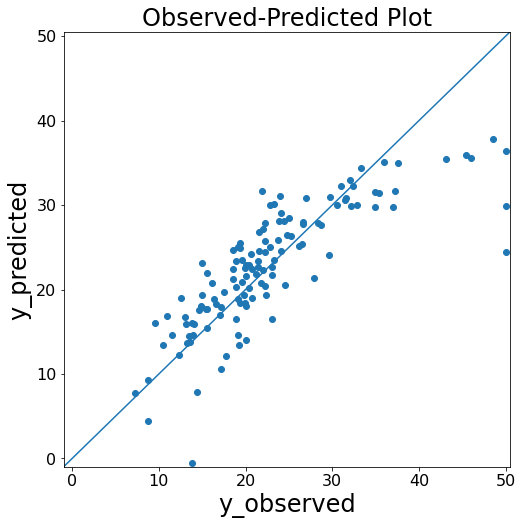

In [76]:
eval(y_test, pred)

# ニューラルネットワーク

In [88]:
# モジュール import
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.15.0


In [89]:
# モデルの構築
# 2つの隠れ層 / 1つの出力層のシーケンシャルモデル
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [90]:
# 標準化
from sklearn import preprocessing
ss = preprocessing.StandardScaler()


l_2d_standardization = ss.fit_transform(df)

print(l_2d_standardization)

print(type(l_2d_standardization))

df_ = pd.DataFrame(columns=df.columns, data=l_2d_standardization)

[[-0.41978194  0.28482986 -1.2879095  ...  0.44105193 -1.0755623
   0.15968566]
 [-0.41733926 -0.48772236 -0.59338101 ...  0.44105193 -0.49243937
  -0.10152429]
 [-0.41734159 -0.48772236 -0.59338101 ...  0.39642699 -1.2087274
   1.32424667]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  0.44105193 -0.98304761
   0.14880191]
 [-0.40776407 -0.48772236  0.11573841 ...  0.4032249  -0.86530163
  -0.0579893 ]
 [-0.41500016 -0.48772236  0.11573841 ...  0.44105193 -0.66905833
  -1.15724782]]
<class 'numpy.ndarray'>


In [91]:
# 正則化を入れる
# 
#x_train, x_test, y_train, y_test = train_test_split(df.loc[:,target_col],df["y"],random_state=123)
x_train, x_test, y_train, y_test = train_test_split(df_.loc[:,target_col],df_["y"],random_state=123)

In [92]:
model = build_model()

In [93]:
# モデルの検証
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [94]:
# 訓練データから10個のバッチを取得してモデルを試してみる
example_batch = x_train[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.06314551],
       [ 0.2893812 ],
       [ 0.5705416 ],
       [-0.00960552],
       [ 0.45413128],
       [ 0.6528212 ],
       [ 0.46166152],
       [ 0.8506205 ],
       [ 0.15017433],
       [ 0.11684871]], dtype=float32)

In [95]:
# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
            print('.', end='')

EPOCHS = 1000

history = model.fit(
    x_train, y_train,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])


.
.
.
.
.
.
.
.
.
.

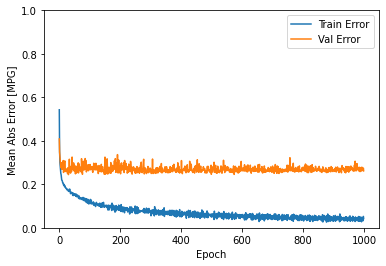

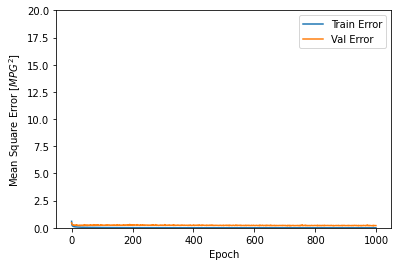

In [96]:
# モデルの学習の様子を可視化する
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
             label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
             label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)


.

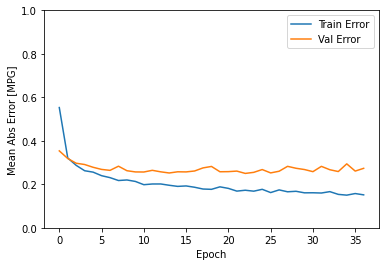

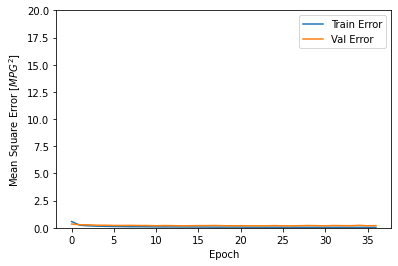

In [97]:
# early_stopを導入する
model = build_model()

# patience は改善が見られるかを監視するエポック数を表すパラメーター
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(x_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [98]:
# 訓練に使用していないテスト用のデータを使用して、みてみる
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

127/127 - 0s - loss: 0.1847 - mean_absolute_error: 0.2604 - mean_squared_error: 0.1847
Testing set Mean Abs Error:  0.26 MPG


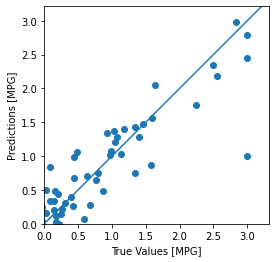

In [99]:
# モデルを使った予測
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [100]:
r2_score(y_test, test_predictions)

0.8024978024047534